# Activity Factor: aree di attività per volumi scambiati

Carichiamo in un DataFrame Pandas la serie oraria dello strumento di lavoro costruendo il campo aggiuntivo "Volume":

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = "@GC_60min.txt"

startDate = "20070810"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Volume'] = instrument['Up'] + instrument['Down']

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(24)

Il file contiene 68540 record


,Open,High,Low,Close,Up,Down,AvgPrice,OpenClose,OpenClosePerc,Volume
Date_Time,,,,,,,,,,
2007-08-10 00:00:00,826.3,826.8,826.1,826.8,165,58,826.50,0.5,0.06,223
2007-08-10 01:00:00,826.8,826.8,825.9,825.9,133,348,826.35,-0.9,-0.11,481
2007-08-10 02:00:00,825.9,826.5,825.4,825.7,454,454,825.88,-0.2,-0.02,908
2007-08-10 03:00:00,825.7,826.8,825.6,826.5,1347,1377,826.15,0.8,0.10,2724
2007-08-10 04:00:00,826.5,827.5,825.6,827.4,1036,598,826.75,0.9,0.11,1634
2007-08-10 05:00:00,827.5,827.6,826.8,827.2,752,395,827.27,-0.3,-0.04,1147
2007-08-10 06:00:00,827.2,828.3,826.4,826.6,1402,1244,827.12,-0.6,-0.07,2646
2007-08-10 07:00:00,826.6,826.8,824.5,824.7,819,1574,825.65,-1.9,-0.23,2393
2007-08-10 08:00:00,824.8,824.8,820.9,822.0,5929,6603,823.12,-2.8,-0.34,12532


Filtriamo per esempio tutti i record alle ore 0 e visualizziamo i primi 10:

In [2]:
instrument[(instrument.index.hour==0)]['Volume'].head(10)

Date_Time
2007-08-10     223
2007-08-13     477
2007-08-14     114
2007-08-15     442
2007-08-16    1689
2007-08-17     698
2007-08-20     299
2007-08-21     388
2007-08-22     168
2007-08-23     416
Name: Volume, dtype: int64

Calcoliamo la media dei volumi registrati alle ore 0:

In [3]:
round(instrument[(instrument.index.hour==0)]['Volume'].mean(),2)

1854.53

Contiamo tutte le occorrenze delle ore 0:

In [4]:
instrument[(instrument.index.hour==0)]['Volume'].count()

2838

Creiamo una lista di orari dalle 0 alle 23:

In [5]:
hours = []

for hour in range(0,24):
    hours.append(hour)
    
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Conserviamo in un array i 24 risultati medi ora per ora:

In [6]:
activity = []

for hour in hours:
    activity.append(instrument[(instrument.index.hour==hour)]['Volume'].mean())
    
activity

[1854.5292459478505,
 1876.7297774637937,
 2704.714235252561,
 4385.739314729777,
 5509.782055810668,
 4650.157132768361,
 4576.275423728814,
 4015.586511299435,
 5467.7488519957615,
 16252.135946327684,
 18016.623234463277,
 19099.99329096045,
 12971.150123631225,
 9044.709745762711,
 8399.600713012478,
 5269.462567811935,
 3645.037960954447,
 1273.6278481012657,
 nan,
 1291.7877824858756,
 1615.1893992932862,
 2829.768986223949,
 3360.767113620325,
 2359.0430486944247]

Studiamo il caso in cui vogliamo normalizzare gli elementi nell'array:

In [7]:
activity = []

def normalizeMinMax(array):
    """
    Funzione per normalizzare un array
    che porta a 0 il valore minimo
    e ad 1 il valore massimo
    (a[i] - min(a))/(max(a)-min(a)) 
    """
    normalized_array = []
    for elements in array:
        normalized_array.append((elements - min(array))/(max(array)-min(array)))
    return normalized_array

def normalizeMax(array):
    """
    Funzione per normalizzare un array
    che porta ad 1 il valore massimo
    a[i]/max(a)
    """
    normalized_array = []
    for elements in array:
        normalized_array.append(elements / max(array))
    return normalized_array

normalize = True

for hour in hours:
    activity.append(instrument[(instrument.index.hour==hour)]['Volume'].mean())
    
if normalize == True:
    activity = normalizeMax(activity)

print(len(activity))
print(activity)

24
[0.09709580614489288, 0.0982581380461533, 0.14160812488518698, 0.22961994006591813, 0.2884703660298305, 0.24346380974747067, 0.2395956560830129, 0.2102402053303292, 0.28626967395760866, 0.8508974688498667, 0.9432790347099281, 1.0, 0.6791180460660238, 0.47354517920398154, 0.43976982531128944, 0.275888189463702, 0.19083975085371116, 0.0666821097106899, nan, 0.06763289194961375, 0.0845649197195119, 0.14815549634581326, 0.17595645518948386, 0.12351015064549267]


Passiamo al modulo grafico (utilizziamo 'bar' di Matplotlib):

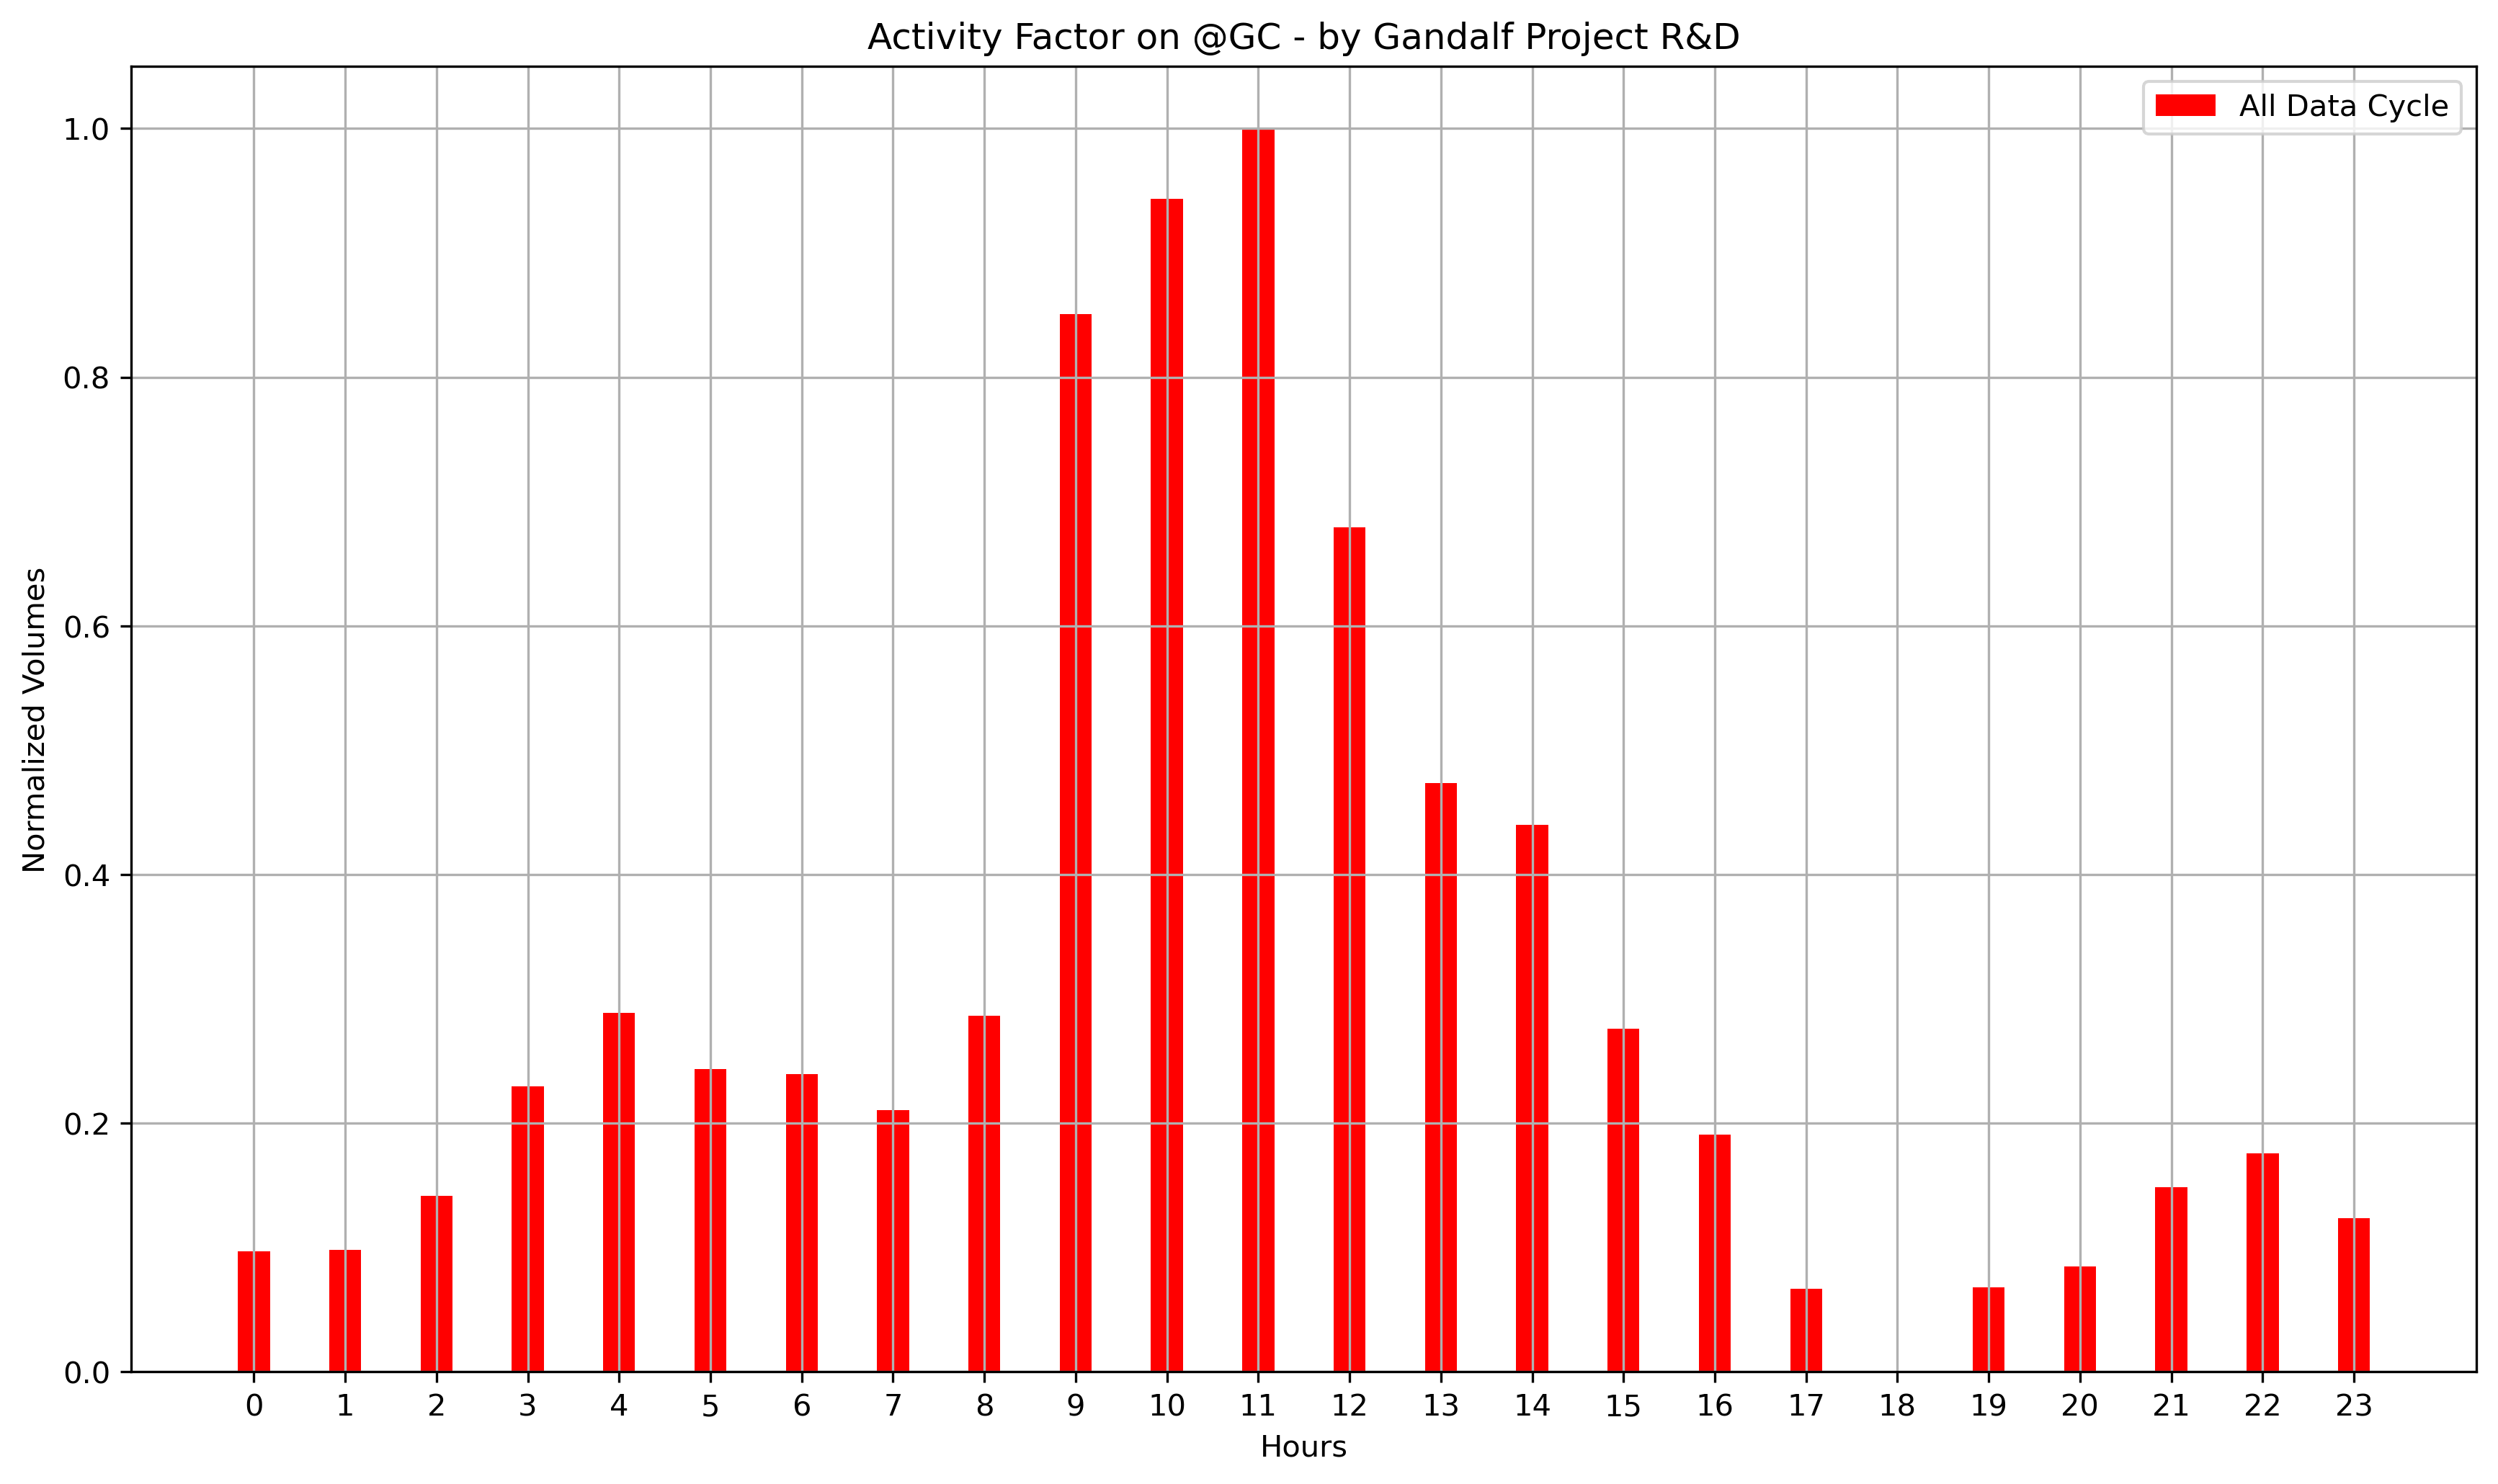

In [8]:
# MODULO GRAFICO **************************************************************************************************
n_groups = 24

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                 activity, 
                 bar_width,
                 alpha=opacity,
                 color='red',
                 label='All Data Cycle')

ax.set_xlabel('Hours')
if normalize == True:
    ax.set_ylabel('Normalized Volumes')
else:
    ax.set_ylabel('Volumes')
ax.set_title('Activity Factor on ' + filename.split('_')[0] + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()
# MODULO GRAFICO **************************************************************************************************

### Mettiamo insieme i pezzi:

Il file contiene 68540 record

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


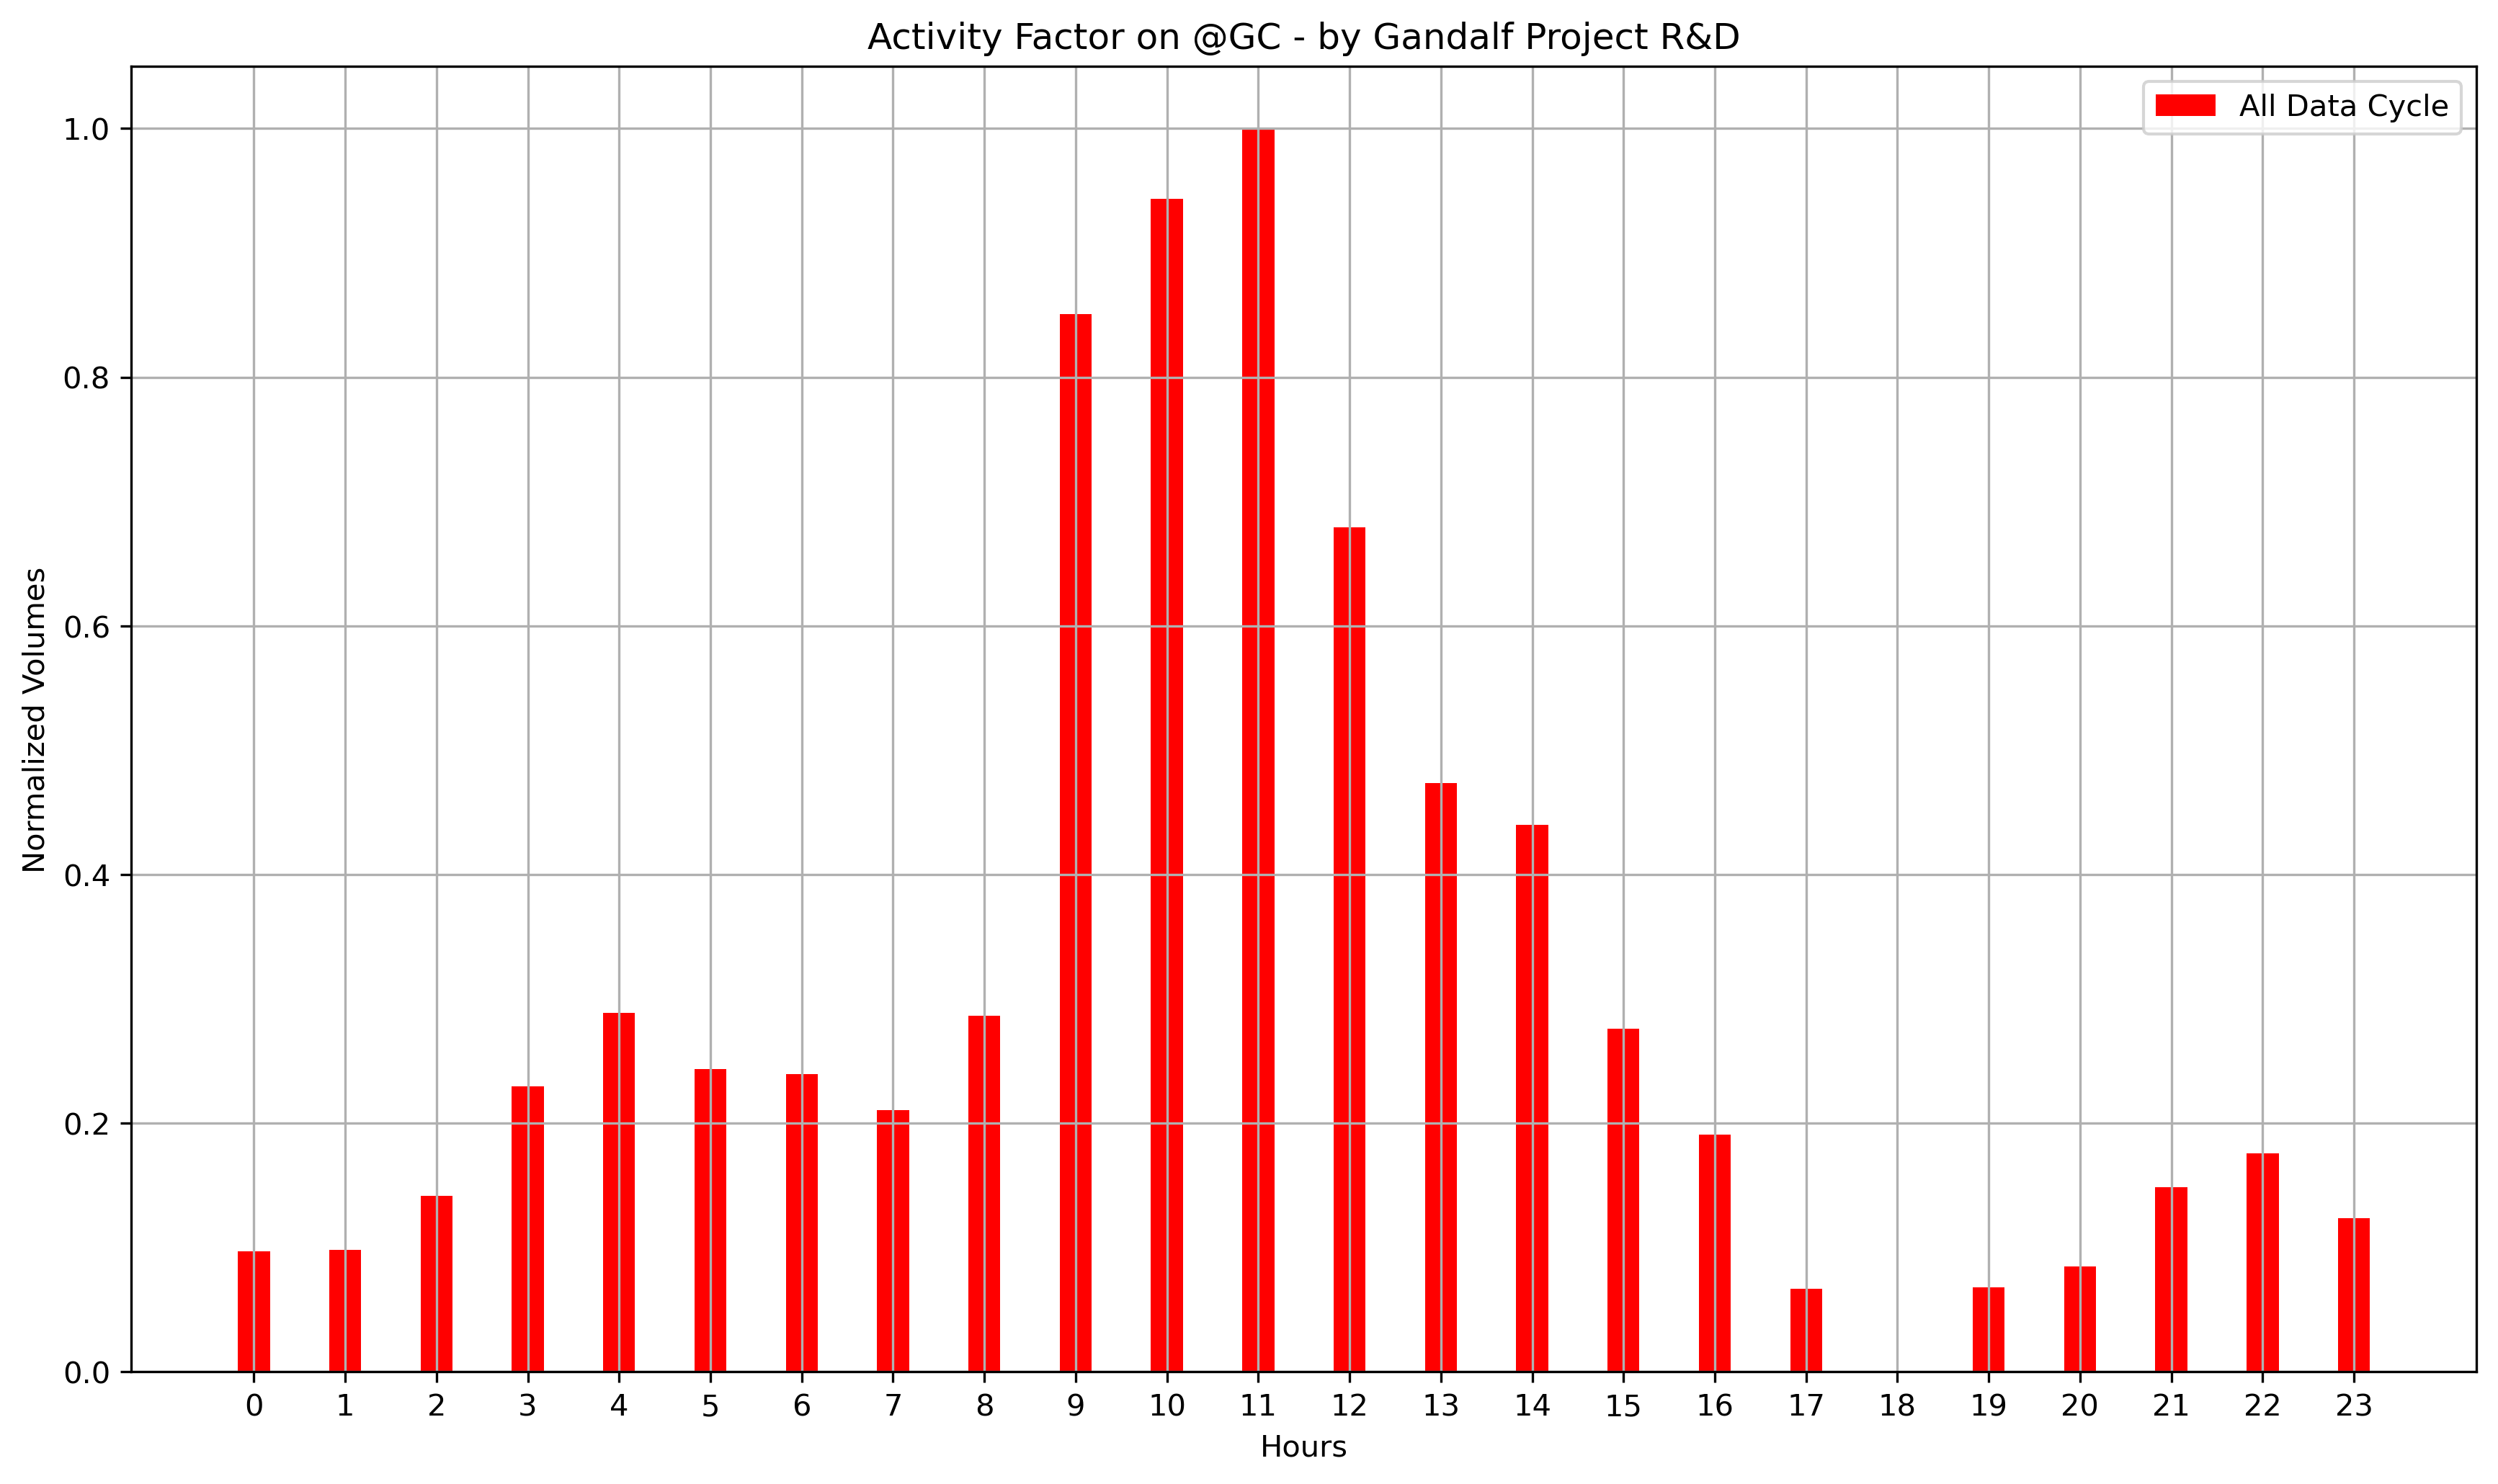

In [9]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def normalizeMinMax(array):
    """
    Funzione per normalizzare un array
    che porta a 0 il valore minimo
    e ad 1 il valore massimo
    (a[i] - min(a))/(max(a)-min(a)) 
    """
    normalized_array = []
    for elements in array:
        normalized_array.append((elements - min(array))/(max(array)-min(array)))
    return normalized_array

def normalizeMax(array):
    """
    Funzione per normalizzare un array
    che porta ad 1 il valore massimo
    a[i]/max(a)
    """
    normalized_array = []
    for elements in array:
        normalized_array.append(elements / max(array))
    return normalized_array

filename = "@GC_60min.txt"

startDate = "20070810"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Volume'] = instrument['Up'] + instrument['Down']

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(24)

hours = []

for hour in range(0,24):
    hours.append(hour)

print("")
print(hours)

activity = []

for hour in hours:
    activity.append(instrument[(instrument.index.hour==hour)]['Volume'].mean())
    
#print("")
#print(activity)

normalize = True
    
if normalize == True:
    activity = normalizeMax(activity)

#print("")
#print(activity)

# MODULO GRAFICO **************************************************************************************************
n_groups = 24

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                 activity, 
                 bar_width,
                 alpha=opacity,
                 color='red',
                 label='All Data Cycle')

ax.set_xlabel('Hours')
if normalize == True:
    ax.set_ylabel('Normalized Volumes')
else:
    ax.set_ylabel('Volumes')
ax.set_title('Activity Factor on ' + filename.split('_')[0] + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()
# MODULO GRAFICO **************************************************************************************************

### CODICE FINALE: replichiamo tutte le analisi su tre periodi (lungo, medio e breve)

Il file contiene 68540 record

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


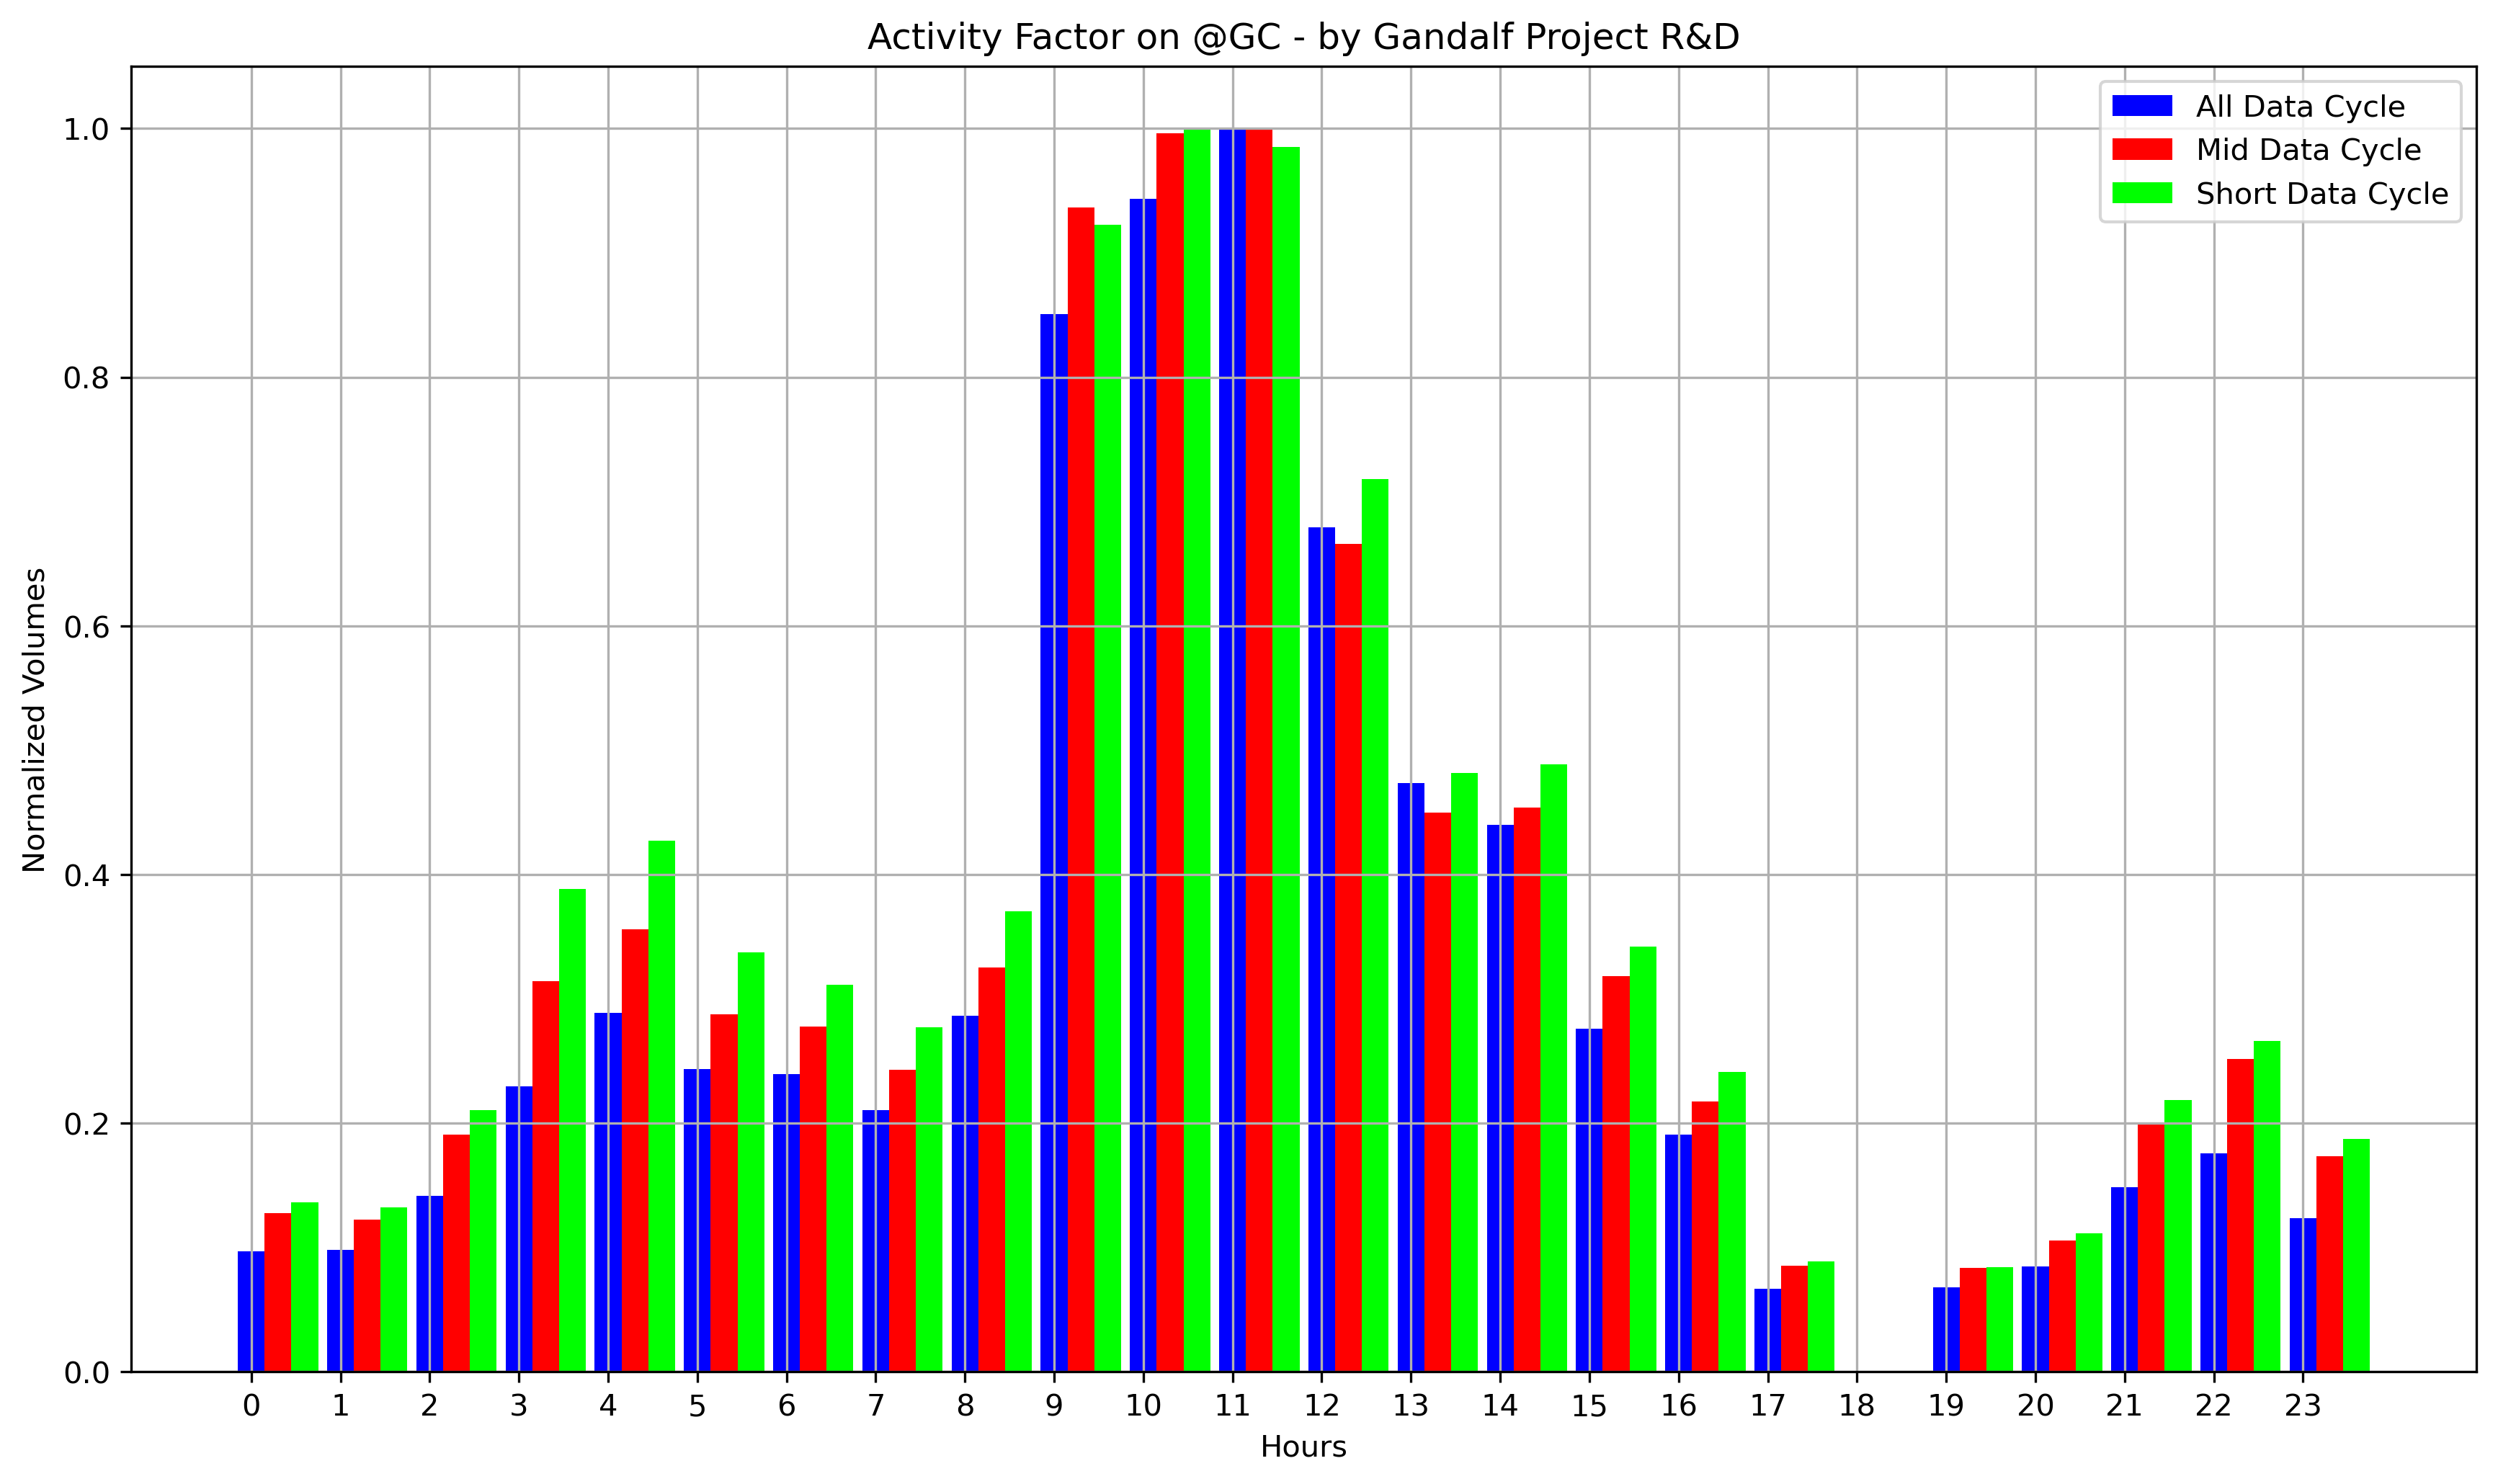

In [11]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def normalizeMinMax(array):
    """
    Funzione per normalizzare un array
    che porta a 0 il valore minimo
    e ad 1 il valore massimo
    (a[i] - min(a))/(max(a)-min(a)) 
    """
    normalized_array = []
    for elements in array:
        normalized_array.append((elements - min(array))/(max(array)-min(array)))
    return normalized_array

def normalizeMax(array):
    """
    Funzione per normalizzare un array
    che porta ad 1 il valore massimo
    a[i]/max(a)
    """
    normalized_array = []
    for elements in array:
        normalized_array.append(elements / max(array))
    return normalized_array

#******* INPUT SECTION *********************************

filename = "@GC_60min.txt"

startDateLong = "20070810"
endDateLong = "20180810"

startDateMid = "20130810"
endDateMid = "20180810"

startDateShort = "20170810"
endDateShort = "20180810"

normalize = True

#******* INPUT SECTION *********************************

startDateLongParsed = datetime.date(int(startDateLong[0:4]), int(startDateLong[4:6]), int(startDateLong[6:]))
endDateLongParsed = datetime.date(int(endDateLong[0:4]), int(endDateLong[4:6]), int(endDateLong[6:]))

startDateMidParsed = datetime.date(int(startDateMid[0:4]), int(startDateMid[4:6]), int(startDateMid[6:]))
endDateMidParsed = datetime.date(int(endDateMid[0:4]), int(endDateMid[4:6]), int(endDateMid[6:]))

startDateShortParsed = datetime.date(int(startDateShort[0:4]), int(startDateShort[4:6]), int(startDateShort[6:]))
endDateShortParsed = datetime.date(int(endDateShort[0:4]), int(endDateShort[4:6]), int(endDateShort[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['Volume'] = instrument['Up'] + instrument['Down']

instrument_Long = instrument.loc[startDateLongParsed:endDateLongParsed]
instrument_Mid = instrument.loc[startDateMidParsed:endDateMidParsed]
instrument_Short = instrument.loc[startDateShortParsed:endDateShortParsed]

activity_long = []
activity_mid = []
activity_short = []

hours = []

for hour in range(0,24):
    hours.append(hour)

print("")
print(hours)

activity = []

for hour in hours:
    activity_long.append(instrument_Long[(instrument_Long.index.hour==hour)]['Volume'].mean())
    activity_mid.append(instrument_Mid[(instrument_Mid.index.hour==hour)]['Volume'].mean())
    activity_short.append(instrument_Short[(instrument_Short.index.hour==hour)]['Volume'].mean())
    
#if normalize == True:
 #   activity_long = normalizeMax(activity_long)
  #  activity_mid = normalizeMax(activity_mid)
   # activity_short = normalizeMax(activity_short)
    
if normalize == True:
    activity_long = np.where(np.isnan(activity_long), 0, activity_long)
    activity_long = normalizeMax(activity_long)
    activity_mid = np.where(np.isnan(activity_mid), 0, activity_mid)
    activity_mid = normalizeMax(activity_mid)
    activity_short = np.where(np.isnan(activity_short), 0, activity_short)
    activity_short = normalizeMax(activity_short)

# MODULO GRAFICO **************************************************************************************************
n_groups = 24

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.30
opacity = 1

rects1 = plt.bar(index, 
                 activity_long, 
                 bar_width,
                 alpha=opacity,
                 color='blue',
                 label='All Data Cycle')

rects2 = plt.bar(index + bar_width, 
                 activity_mid, 
                 bar_width,
                 alpha=opacity,
                 color='red',
                 label='Mid Data Cycle')

rects3 = plt.bar(index + 2 * bar_width, 
                 activity_short, 
                 bar_width,
                 alpha=opacity,
                 color='lime',
                 label='Short Data Cycle')

ax.set_xlabel('Hours')
if normalize == True:
    ax.set_ylabel('Normalized Volumes')
else:
    ax.set_ylabel('Volumes')
ax.set_title('Activity Factor on ' + filename.split('_')[0] + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']))
ax.legend()
ax.grid(True)
plt.show()
# MODULO GRAFICO **************************************************************************************************